Link Tableau: https://public.tableau.com/views/h8dsft_Milestone1_mujahid/StorySegmentation?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

# Perkenalan



Nama: Mujahid  
Batch: RMT-022  
Objective: Project ini adalah untuk menganalisis segmentasi UK Bank Customers dengan menjawab beberapa pertanyaan analisis dan beberapa visualisasi untuk menguatkan analisis yang diharapkan bisa membantu UK Bank untuk mengambil langkah bisnis kedepannya.

# Identifikasi Masalah

## Problem Statement

**Problem Statement**: Analisis Segmentasi Customer bank di UK Berdasarkan Data UK-Customers-Bank.

## SMART

**Specific**:
Menganalisis segmentasi pelanggan dalam dataset UK Customers Bank untuk memahami karakteristik dan perilaku pelanggan yang berbeda.

**Measurable**:
Mengidentifikasi kategori pelanggan berdasarkan atribut seperti usia, gender, wilayah, pekerjaan, dan saldo. Mengukur distribusi pelanggan di masing-masing kategori.

**Achievable**:
Mengumpulkan dan menyusun data dari kolom 'Gender', 'Age', 'Region', 'Job Classification', dan 'Balance' untuk analisis.

**Relevant**:
Analisis segmentasi pelanggan akan memberikan wawasan berharga kepada UK Customers Bank untuk mengembangkan strategi pemasaran yang lebih efektif dan layanan yang lebih disesuaikan.

**Time-bound**:
 Tujuan ini akan dicapai dalam 1 pekan, dengan laporan hasil analisis akan disajikan pada akhir periode tersebut

## Penjabaran Masalah

1. Bagaimana distribusi data dari kolom Balance?
2. Bagaimana distribusi data dari kolom Age?
3. Berapa banyak customer yang berasal dari setiap region?
4. Apakah jumlah customer wanita lebih banyak daripada pria, atau sebaliknya?
5. Apakah ada perbedaan yang signifikan dalam rata-rata Balance pada setiap Job Classification?
6. Apakah ada korelasi antara usia customer dan rata-rata Balance?
7. Dimana Region yang memiliki total balance paling besar?

# Data Loading

Link Dataset: https://www.kaggle.com/datasets/ukveteran/uk-bank-customers

## Import Library yang diperlukan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import skew, f_oneway

## Baca Data

In [ ]:
# load data dengan melewati ketika bad lines
df = pd.read_csv("uk-bank-customers.csv", on_bad_lines='skip')

# Data Cleaning

## Cek dimensi data

In [ ]:
df.shape

(4014, 9)

Dataset kami memiliki 9 kolom dan 4014 baris (record).

## Cek ringkasan data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4014 non-null   int64  
 1   Name                4014 non-null   object 
 2   Surname             4014 non-null   object 
 3   Gender              4014 non-null   object 
 4   Age                 4014 non-null   int64  
 5   Region              4014 non-null   object 
 6   Job Classification  4014 non-null   object 
 7   Date Joined         4014 non-null   object 
 8   Balance             4014 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


Nah dari info di atas, kita bisa ketahui bahwa dataset UK Customers Bank memiliki kolom Customer ID, Name, Surname, Gender, Age, Region, Job Classification, Date Joined, Balance. Dan tidak memiliki _missing values_.


## Cek gambaran isi dari data

In [ ]:
# menampilkan 5 record teratas
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


## Cek data yang duplikat

In [ ]:
# cek total data dupikat
df.duplicated().sum()

0

Menarik, data tidak ada yg duplikat. Mari cek _missing values_,

## Cek _missing values_

In [ ]:
df.isna().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

Wow, data tidak ada yang _missing_. Oke selanjutnya mari lakukan drop column yang tidak terpakai untuk dianalisis,

## Drop kolom yang tidak terpakai

In [ ]:
# inisiasi variabel untuk kolom yang akan didrop
columns_to_drop = [
    'Customer ID',
    'Name', 'Surname',
    'Date Joined'
]

df.drop(columns=columns_to_drop, inplace=True)

Siip, kolom yang tidak terpakai untuk dianalisis sudah dihilangkan, selanjutnya siap masuk ke tahap analisis dan perhitungan!

# Analisis dan perhitungan

## Menghitung ukuran pemusatan data dari kolom balance

In [ ]:
balance_stats = pd.Series({
    "mean": df['Balance'].mean(),
    "median": df['Balance'].median(),
    "mode": df['Balance'].mode().values[0],
    "skew": skew(df['Balance'])
}).round(2)

balance_stats

mean      39766.45
median    33567.33
mode       9867.56
skew          0.98
dtype: float64

Hmmm menarik, dari hasil yang didapatkan, kolom balance memiliki indikasi data miring ke kanan (__positive skewness_) karena "mean > median > mode" dan nilai skew yang lebih besar dari nol dan positif. Mari visualisasikan untuk lebih lanjutnya,

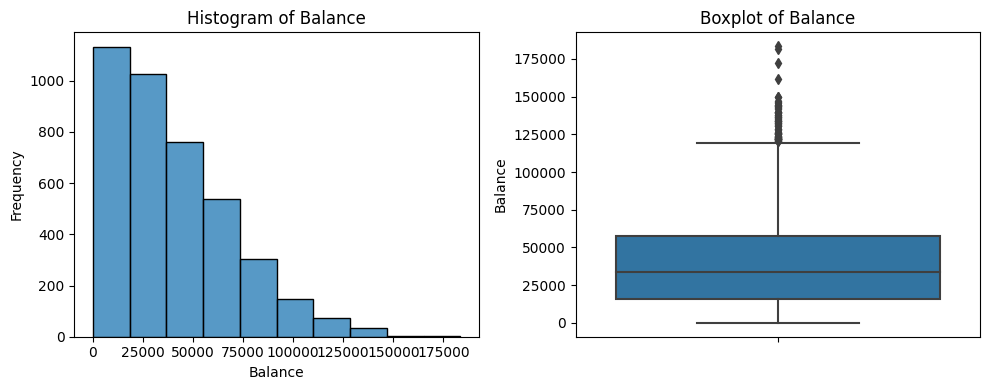

In [ ]:
# membuat histplot untuk visualisasikan data yang diperlukan
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Balance', bins=10, edgecolor='black')
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Balance')
plt.title('Boxplot of Balance')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

Yaps, ternyata memang benar terjadi kemiringan ke kanan, dan kalau dilihat dari boxplot, ada indikasi outlier / nilai extreme, Mari cek berapa persen nilai outliernya,

## Cek persentase outlier dari kolom Balance

In [ ]:
# melakukan perhitungan tukey's Rule
q1 = df['Balance'].quantile(0.25)
q3 = df['Balance'].quantile(0.75)
iqr = q3-q1

# mencari batas atas
up_bound = q3 + 1.5*iqr
# mencari batas bawah
low_bound = q1 - 1.5*iqr

# inisiasi variabel untuk menyimpan data outlier
outlier = df['Balance'][(df['Balance']<low_bound) | (df['Balance']>up_bound)]

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')
print(f"Percentage of outliers in the balance column: {len(outlier)*100/len(df['Balance']):.2f}%")

Upper Boundary: 119661.77
Lower Boundary: -46012.48
Percentage of outliers in the balance column: 1.67%


Tukey's Rule adalah salah satu metode untuk pengecekan outlier, dan dari hasil di atas, ternyata kolom Balance memiliki sekitar 1.67% nilai outlier.

Hmm menarik, selanjutnya cek ukuran pemusatan data untuk kolom Age.

## Menghitung ukuran pemusatan data pada kolom Age

In [ ]:
age_stats = pd.Series({
    "mean": df['Age'].mean(),
    "median": df['Age'].median(),
    "mode": df['Age'].mode().values[0],
    "skew": skew(df['Age'])
}).round(2)

age_stats

mean      38.61
median    37.00
mode      34.00
skew       0.34
dtype: float64

Menarik, dari hasil tersebut kolom Age ada indikasi distribusinya miring ke kanan, mari visualisasikan,

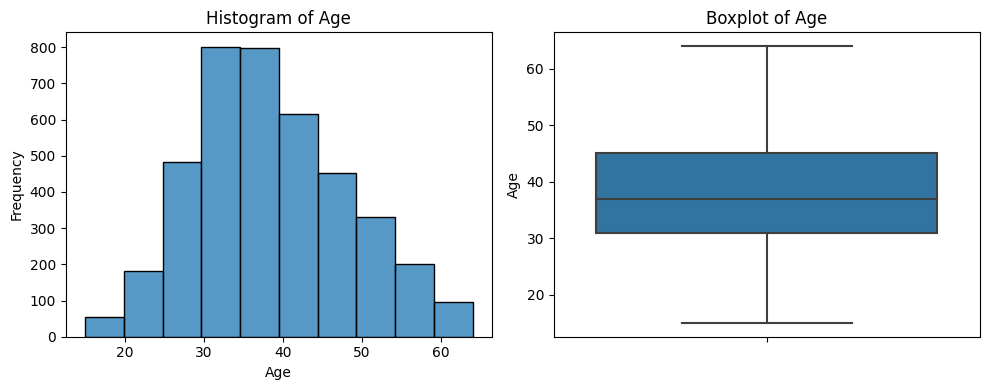

In [ ]:
# membuat histplot untuk menampilkan/memvisualisasikan data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=10, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

Yapps, ternyata dari hasil visualiasasi kolom Age memang cenderung miring ke kanan tapi tidak terlalu ekstrim, dan kalau dilihat dari boxplot, sepertinya kolom Age tidak ada nilai outlier. Mari kita cek,

## Cek persentase outlier dari kolom Age

In [ ]:
# Melakukan perhitungan tukey's Rule untuk mencari data outlier
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# inisiasi variabel untuk menyimpan data outlier
outlier = df['Age'][(df['Age']<low_bound) | (df['Age']>up_bound)]

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')
print(f"Percentage of outliers in the Age column: {len(outlier)*100/len(df['Age']):.2f}%")

Upper Boundary: 66.00
Lower Boundary: 10.00
Percentage of outliers in the Age column: 0.00%


Lagi dengan Tukey's Rule, kolom Age memiliki 0 persen nilai outlier.  

Selanjutnya mari cari tahu jumlah customer pada setiap Region,

## Berapa banyak customer yang berasal dari setiap region?


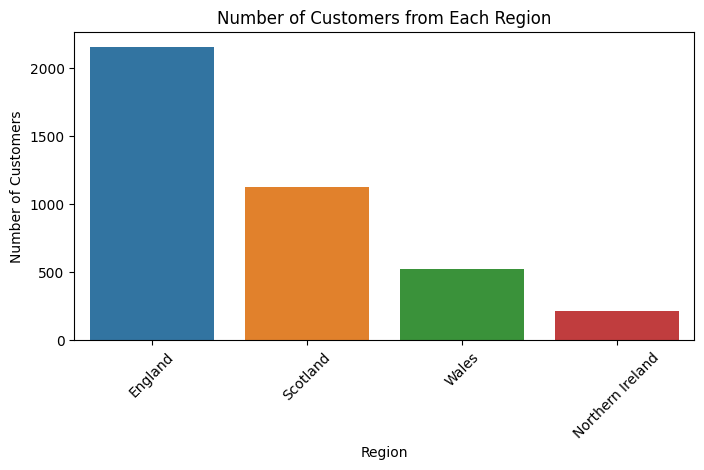

In [ ]:
# menghitung banyak record tiap region
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers from Each Region')
plt.xlabel('Region')

plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Wow keren, dengan visualisasi di atas, kita bisa ketahui banyak customer tiap region, dan ternyata __England__ adalah region dengan jumlah customer terbanyak!  

Selanjutnya mari kita cek distribusi gender dari UK Customer Bank,

## Apakah jumlah customer wanita lebih banyak daripada pria, atau sebaliknya?

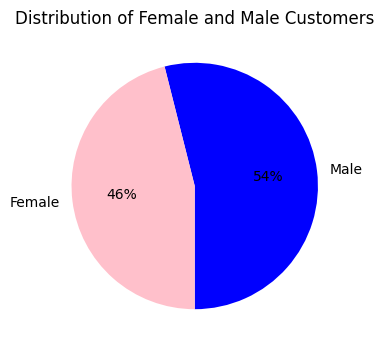

In [ ]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=270, colors=['blue', 'pink'])
plt.title('Distribution of Female and Male Customers')
plt.show()

Menarik, ternyata persentase customer Male lebih besar dibandingkan customer Female.  

Kami bertanya-tanya apakah Job Classification mempengaruhi rata-rata Balance pada data, mari cari tahu dengan melakukan __Hipotesis Testing__!

## Hipotesis Testing: Apakah ada perbedaan yang signifikan dalam rata-rata Balance pada setiap Job Classification?


Sebelum melakukan hipotesis, mari cek terlebih dahulu dengan pendekatan visualisasi setiap Job,

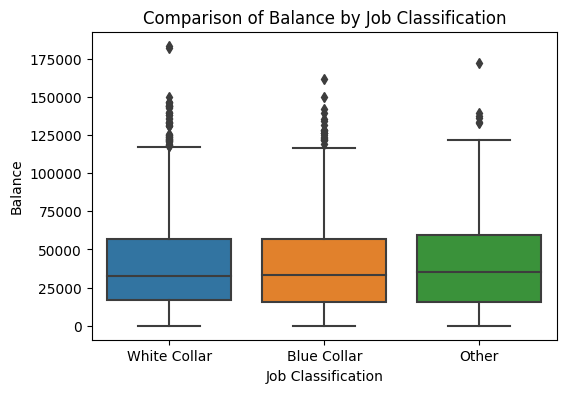

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Job Classification', y='Balance')
plt.title('Comparison of Balance by Job Classification')
plt.xlabel('Job Classification')
plt.ylabel('Balance')
plt.show()

Kalau dilihat dari hasil visualisasi sepertinya tidak ada perbedaan yang signifikan, mari cek dengan melakukan hipotesis testing metode ANOVA,

`Hipotesis Nol (H0)`: Tidak ada perbedaan yang signifikan dalam saldo rekening rata-rata antara kelompok pekerjaan.

`Hipotesis Alternatif (H1)`: Ada perbedaan yang signifikan dalam saldo rekening rata-rata antara setidaknya satu pasangan kelompok pekerjaan.

In [ ]:
# inisasi variabel untuk menyimpan rata-rata balance pada setiap job
white_collar = df['Balance'][df['Job Classification'] == 'White Collar']
blue_collar = df['Balance'][df['Job Classification'] == 'Blue Collar']
other = df['Balance'][df['Job Classification'] == 'Other']


print(f'Average Balance of White Collar Group: {white_collar.mean():.2f}')
print(f'Average Balance of Blue Collar Group: {blue_collar.mean():.2f}')
print(f'Average Balance of Other Group: {other.mean():.2f}')

Average Balance of White Collar Group: 39931.40
Average Balance of Blue Collar Group: 39403.29
Average Balance of Other Group: 39824.34


Hasil di atas adalah melihat rata-rata Balance dari tiap job (White collar, Blue collar, other).

In [ ]:
# melakukan perhitungan ANOVA
result = f_oneway(white_collar, blue_collar, other)
result.pvalue

0.896497899504341

Dari pengujian ANOVA di atas, didapatkan p-value sebesar 0.896, karena nilai tersebut lebih besar dari 0.05 (nilai signifikan) maka tidak ada alasan untuk menolak H0, yang artinya H0:Tidak ada perbedaan yang signifikan dalam saldo rekening rata-rata antara kelompok pekerjaan, disetujui.

## Apakah ada korelasi antara usia customer dan rata-rata Balance?


Setelah mencari tahu apakah ada perbedaan balance pada setiap jenis pekerjaan, kami bertanya-tanya apakah usia berkolerasi dengan rata-rata Balance, mari caru tahu!

Text(0, 0.5, 'Average')

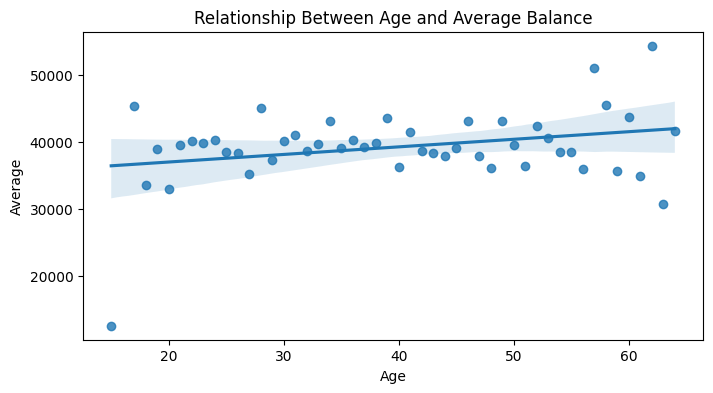

In [ ]:
average_balance_by_age = df.groupby('Age')['Balance'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.regplot(x='Age', y='Balance', data=average_balance_by_age)
plt.title('Relationship Between Age and Average Balance')
plt.xlabel('Age')
plt.ylabel('Average')

Menarik, dari hasil visualisasi di atas, terindikasi Age dan rata-rata Balance memiliki korelasi positif namun sangat lemah/kecil.

Oke, terakhir mari cari tahu total Balance pada setiap Region!

## Dimana Region yang memiliki total balance paling besar?

In [ ]:
total_balance_by_location = df.groupby('Region')['Balance'].sum().reset_index()
total_balance_by_location

,Region,Balance
0,England,84833397.00
1,Northern Ireland,8335566.39
2,Scotland,44410730.72
3,Wales,22042829.26


Wow menarik, sebelumnya kita ketahui England adalah region dengan jumlah customer terbanyak, dan sekarang England adalah region dengan total balance terbesar!

# Pengambilan Kesimpulan


Melalui serangkaian analisis yang dilakukan melalui pertanyaan-pertanyaan terstruktur, kami telah memperoleh wawasan mendalam mengenai profil pelanggan dalam dataset UK-Customers-Bank. Dari hasil jawaban pertanyaan-pertanyaan tersebut, kami berharap bahwa UK Bank akan dapat mengambil keputusan yang lebih cerdas dan terinformasi dalam merancang strategi pemasaran yang lebih efektif.